In [18]:
import warnings

import pandas as pd
from pathlib import Path
import glob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import modules
from src.data_processing import genotypeData
from src.rules_creation import rulesMining
from src.network_model import rulesNetwork

warnings.filterwarnings("ignore")

In [13]:
path = 'data/P1'
file_pattern = '_genotype'
metadata = './data/P1_metadata.tsv'
d_metadata = pd.read_csv(metadata, delimiter= "\t").set_index('subject')['status'].T.to_dict()
gd = genotypeData(path, d_metadata, file_pattern)
files = gd.list_files()
genotypes = gd.read_files(files)
genotypes_clean = gd.clean_genotype_data(genotypes, silent=True)

In [14]:
 # mining rules
mr = rulesMining(genotypes_clean, transactions_columns="calls")
rules = mr.mining_rules()


In [15]:
# creating network
net = rulesNetwork(rules, genotypes_clean)
graph = net.create_network_multiprocess(processes=2)
path,steps,path_increase_value = net.greedy_max_weight()

In [19]:
# get predictions
pred = net.get_prediction(path)
cm = net.get_confusion_matrix(path)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [21]:
print('For the chosen path: {}'.format(list(set(path))))
print('The F1 score prediction is {}'.format(pred))
print('The confusion matrix is:')


For the chosen path: ['IGHV4-30-2*Deletion', 'IGHV4-39*01', 'IGHV5-51*03']
The F1 score prediction is 0.8
The confusion matrix is:


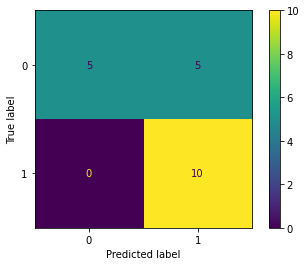

In [22]:
disp.plot()